The implementation for the updates of weights and biases for all types of regression (linear, logistic and polynomial so far) was first implemented with a batch gradient descent. Recently, a new mini-batch gradient descent algorithm was implemented in preparation for possible large datasets. 

In [5]:
import numpy as np 
import os, sys
import time

Adding the `/src` directory to the os path.

In [6]:
sys.path.append(os.path.abspath("../src"))
from sl_reg import LinearRegression
from logistic_reg import LogisticRegression
from pol_reg import PolynomialRegression
from train import train_slr, train_pol_reg

In [7]:
def bench(func, *args, **kwargs):
    start = time.time()
    mod = func(*args, **kwargs)
    end = time.time()
    return end - start, mod


def output(samples = 100):
    mini_batch_bool = [False, True]
    for val in mini_batch_bool:
        runtime, mod = bench(train_slr, mini_batch = val, samples = samples)
        print(f"····· Runtime for SLR with Mini-Batch GD: {val} is {runtime:.4f} seconds")

    print("-" * 130)

    for val in mini_batch_bool:
        runtime, mod = bench(train_pol_reg, mini_batch = val)
        print(f"····· Runtime for PolReg with Mini-Batch GD: {val} is {runtime:.4f} seconds")

output()

y = [41.85300714]x + 0.45278445750659374 --> Mini-Batch GD: False
MSE = 22.476574146528563
····· Runtime for SLR with Mini-Batch GD: False is 0.0054 seconds
y = [43.17971776]x + 0.5953585218920014 --> Mini-Batch GD: True
MSE = 21.005581023094148
····· Runtime for SLR with Mini-Batch GD: True is 0.1135 seconds
----------------------------------------------------------------------------------------------------------------------------------
y = [ 142.54832198  -50.05282129 1664.19461412]x + 142.5483219812984 --> Mini-Batch GD: False
MSE = 180937.81250824855
····· Runtime for PolReg with Mini-Batch GD: False is 0.0150 seconds
y = [   6.6162506    84.38954768 1867.35072494]x + 6.616250601239315 --> Mini-Batch GD: True
MSE = 115477.77650416168
····· Runtime for PolReg with Mini-Batch GD: True is 0.4967 seconds


Increasing number of sample points generated.

In [8]:
output(samples = 1000000)

y = [20.76705062]x + -0.004515371343766849 --> Mini-Batch GD: False
MSE = 25.13006933944422
····· Runtime for SLR with Mini-Batch GD: False is 1.6336 seconds
y = [0.11090379]x + -0.0008230644355005814 --> Mini-Batch GD: True
MSE = 466.9648206910026
····· Runtime for SLR with Mini-Batch GD: True is 43.1284 seconds
----------------------------------------------------------------------------------------------------------------------------------
y = [ 142.54832198  -50.05282129 1664.19461412]x + 142.5483219812984 --> Mini-Batch GD: False
MSE = 180937.81250824855
····· Runtime for PolReg with Mini-Batch GD: False is 0.0240 seconds
y = [   5.8926937    86.11405768 1868.68641824]x + 5.892693698455189 --> Mini-Batch GD: True
MSE = 115490.86214215397
····· Runtime for PolReg with Mini-Batch GD: True is 0.5680 seconds


y = [41.85300714]x + 0.45278445750659374 --> Mini-Batch GD: False
MSE = 22.476574146528563


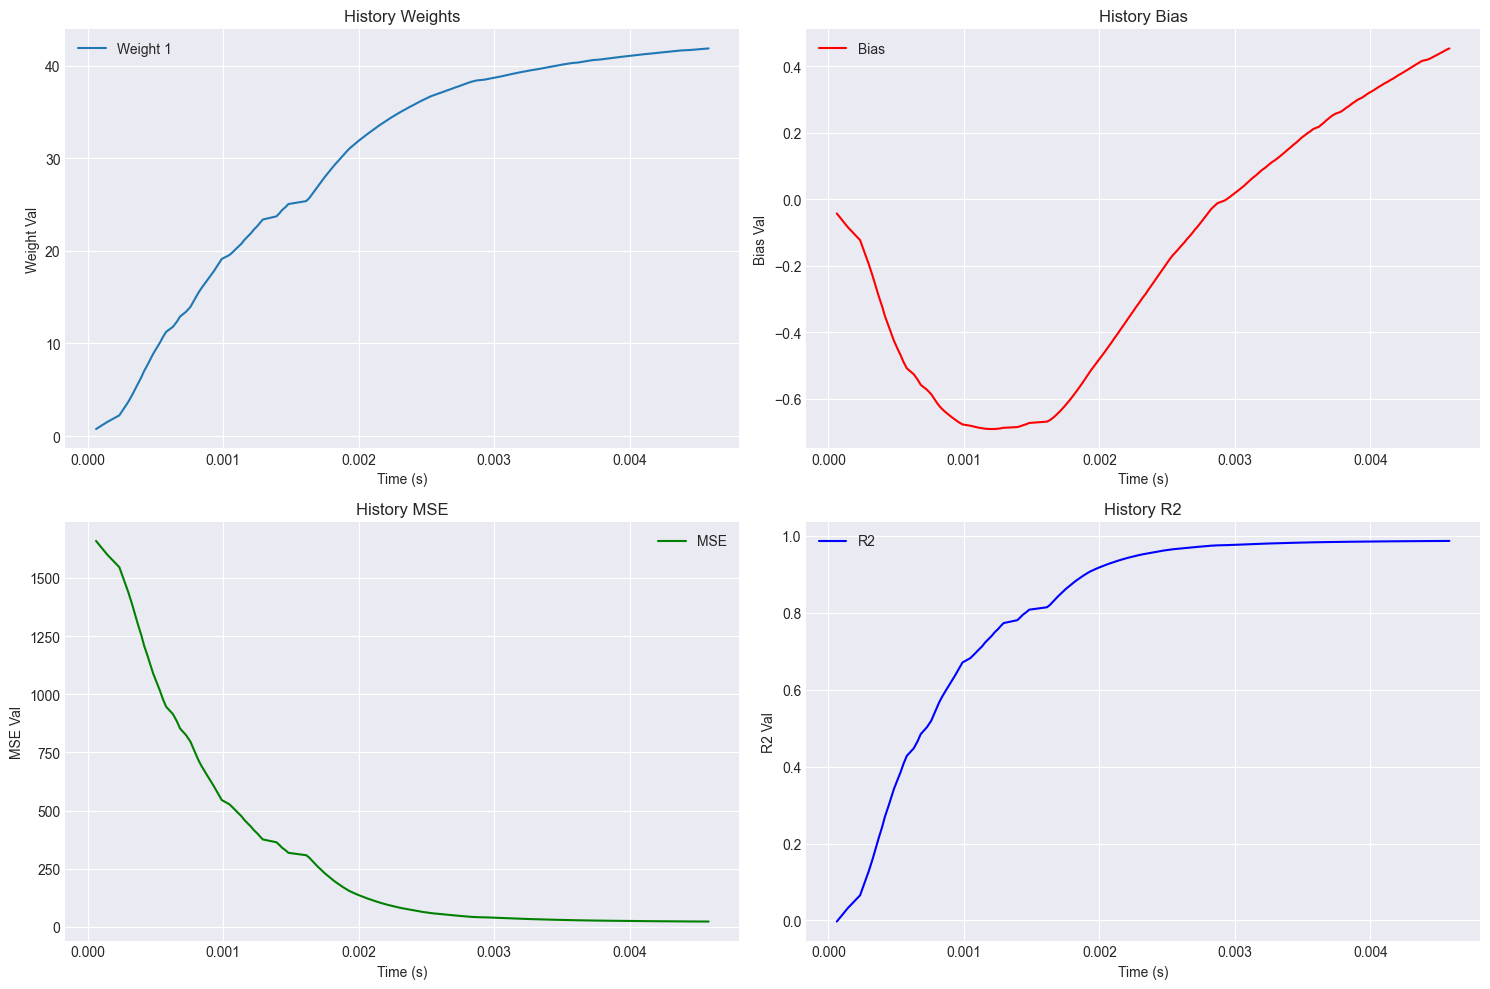

In [9]:
import matplotlib.pyplot as plt

def plot_weights_bias(model):
    fig, axs = plt.subplots(2, 2, figsize = (15, 10))
    
    for i in range(len(model.w_hist[0])):
        w_hist_i = [w[i] for w in model.w_hist]
        axs[0, 0].plot(model.time_hist, w_hist_i, label = f"Weight {i+1}")
        
    axs[0, 0].set_title("History Weights")
    axs[0, 0].set_xlabel("Time (s)")
    axs[0, 0].set_ylabel("Weight Val")
    axs[0, 0].legend()

    axs[0, 1].plot(model.time_hist, model.b_hist, label = "Bias", color = "r")
    axs[0, 1].set_title("History Bias")
    axs[0, 1].set_xlabel("Time (s)")
    axs[0, 1].set_ylabel("Bias Val")
    axs[0, 1].legend()
    
    axs[1, 0].plot(model.time_hist, model.mse_hist, label = "MSE", color = "g")
    axs[1, 0].set_title("History MSE")
    axs[1, 0].set_xlabel("Time (s)")
    axs[1, 0].set_ylabel("MSE Val")
    axs[1, 0].legend()
    
    axs[1, 1].plot(model.time_hist, model.r2_hist, label = "R2", color = "b")
    axs[1, 1].set_title("History R2")
    axs[1, 1].set_xlabel("Time (s)")
    axs[1, 1].set_ylabel("R2 Val")
    axs[1, 1].legend()

    plt.tight_layout()
    plt.show()

reg = train_slr(mini_batch = False)
plot_weights_bias(reg)

And now we plot the same thing with `mini_batch = True` attribute.

y = [42.82632263]x + 0.8678566170361971 --> Mini-Batch GD: True
MSE = 21.080109286879086


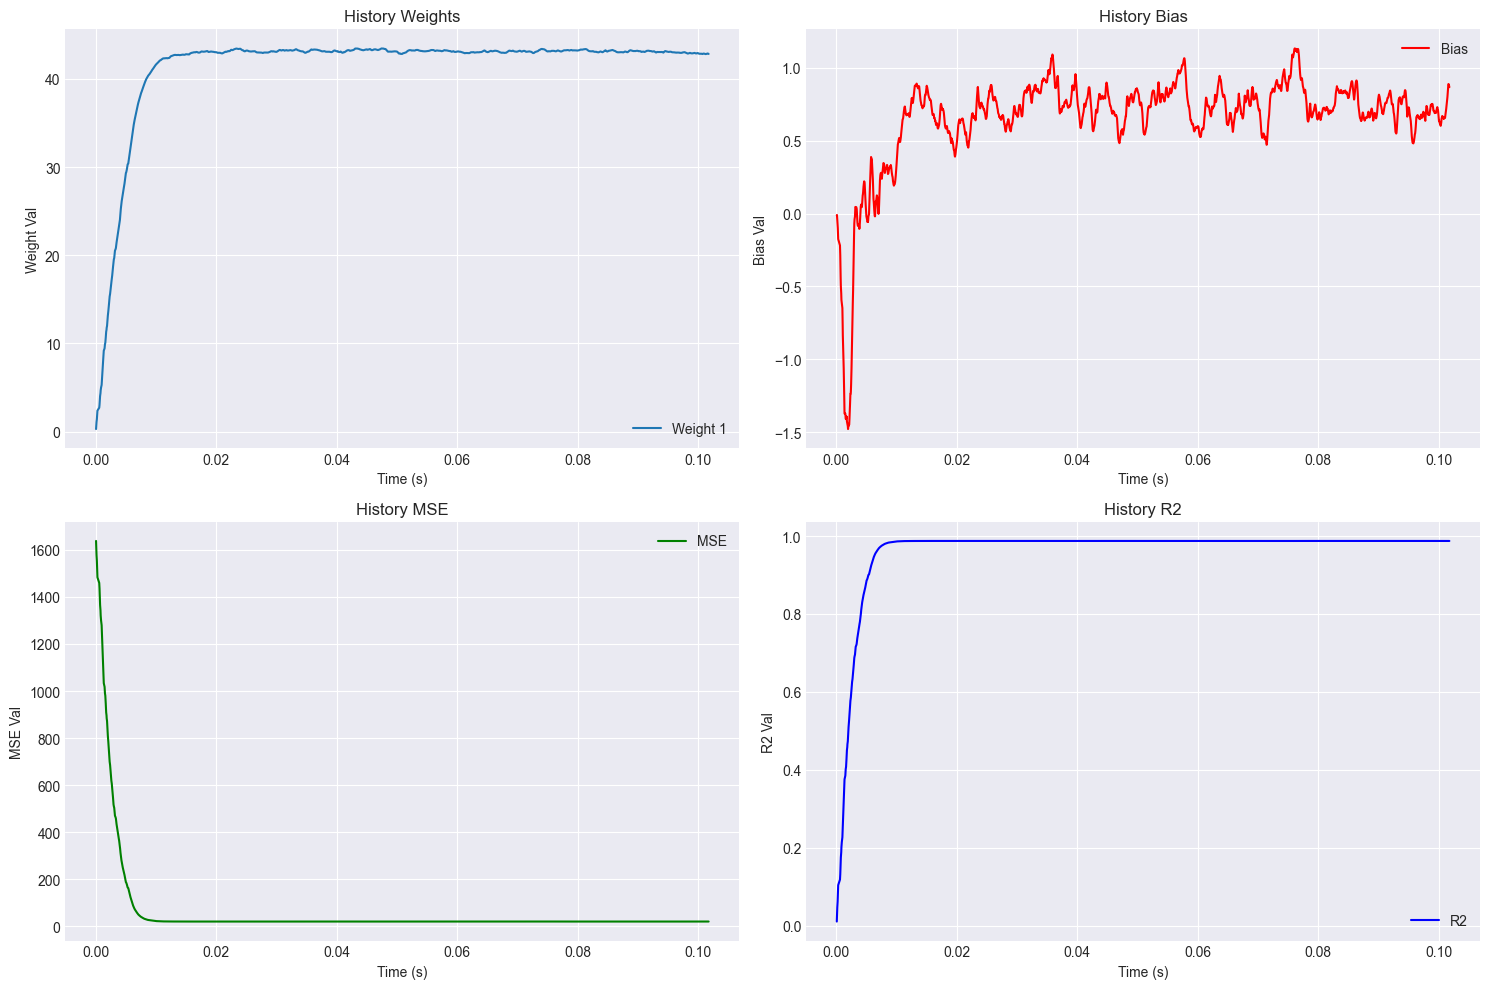

In [10]:
reg = train_slr(mini_batch = True)
plot_weights_bias(reg)